# Config and Import

In [242]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time
import datetime

# numeric and matrix operations
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

# Read files

In [142]:
ruta = '../data/'

df_sales = pd.read_csv(ruta+'weekly_sales_cleandata.csv')
df_dailysales = pd.read_csv(ruta+'daily_sales_cleandata.csv')

In [228]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8354260 entries, 0 to 8354259
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          object 
 1   item        object 
 2   category    object 
 3   department  object 
 4   store       object 
 5   store_code  object 
 6   region      object 
 7   yearweek    int64  
 8   qty_sold    int64  
 9   sell_price  float64
 10  revenue     float64
dtypes: float64(2), int64(2), object(7)
memory usage: 701.1+ MB


In [144]:
df_sales['sell_price'].isnull().sum()

0

In [145]:
df_sales[df_sales['sell_price'].isnull()]

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price


In [146]:
df_sales[df_sales['sell_price'].isnull()]['yearweek'].value_counts()

Series([], Name: count, dtype: int64)

In [147]:
df_sales['revenue'] = df_sales['qty_sold']*df_sales['sell_price']

# Clustering

## >> Clustering por productos

In [148]:
print("La fecha y hora actual es:", datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))


La fecha y hora actual es: 2024-02-29 22:30:55


In [255]:
df_product_features = df_sales.groupby('item').agg(
                        total_sales = ('qty_sold', 'sum'),
                        min_sales = ('qty_sold', 'min'),
                        mean_sales = ('qty_sold', 'mean'),
                        median_sales = ('qty_sold', 'median'),
                        max_sales = ('qty_sold', 'max'),
                        
                        min_price = ('sell_price', 'min'),
                        mean_price = ('sell_price', 'mean'),
                        median_price = ('sell_price', 'median'),
                        max_price = ('sell_price', 'max'),

                        total_revenue = ('revenue', 'sum'),
                        mean_revenue = ('revenue', 'mean'),
                        median_revenue = ('revenue', 'median'),
                        max_revenue = ('revenue', 'max'),
                        min_revenue = ('revenue','min'), 
                                                
                    )

#al hacer el groupby ya tenemos el item como index

,total_sales,min_sales,mean_sales,median_sales,max_sales,min_price,mean_price,median_price,max_price,total_revenue,mean_revenue,median_revenue,max_revenue,min_revenue
item,,,,,,,,,,,,,,
HOME_&_GARDEN_2_507,8782,0,3.205109,2.0,31,3.1125,8.694904,8.7125,9.0875,76488.9625,27.915680,17.425,270.0875,0.0
SUPERMARKET_1_208,25581,0,9.336131,8.0,72,2.1360,2.202219,2.1360,2.3520,56308.3200,20.550482,18.816,153.7920,0.0
SUPERMARKET_3_117,64951,0,23.704745,7.0,282,2.2560,2.566572,2.6880,2.7360,159632.1360,58.259904,18.048,666.6480,0.0
SUPERMARKET_3_567,6593,0,2.406204,0.0,48,1.1880,2.171803,2.0880,2.3760,14340.8640,5.233892,0.000,100.2240,0.0
HOME_&_GARDEN_2_219,13304,0,4.855474,4.0,38,1.8750,3.922363,3.7125,4.3500,51301.1250,18.723038,14.850,139.6500,0.0
HOME_&_GARDEN_1_303,148818,0,54.313139,41.0,348,1.0500,1.196542,1.2125,1.2250,177999.2000,64.963212,48.500,421.9500,0.0
HOME_&_GARDEN_1_206,6592,0,2.405839,2.0,21,2.9625,6.091204,6.1500,6.2250,40132.6000,14.646934,11.175,129.1500,0.0
HOME_&_GARDEN_1_393,34248,0,12.499270,8.0,85,1.2375,2.472760,2.4750,2.4750,84699.2875,30.912149,19.800,210.3750,0.0
SUPERMARKET_1_191,7358,0,2.685401,1.0,19,5.2800,7.309174,7.2360,8.7240,51973.0440,18.968264,8.316,135.2040,0.0


## Adding features by region

In [256]:
df_sales_region = df_sales.groupby(['region', 'item'])['qty_sold'].sum().reset_index()
df_sales_region['qty_region'] = df_sales_region.groupby('item')['qty_sold'].transform('sum')
df_sales_region['%_qty'] = (df_sales_region['qty_sold']/df_sales_region['qty_region']) * 100

# Pivotamos el DataFrame para tener una columna por cada región
df_regions = df_sales_region.pivot(index='item', columns='region', values='%_qty').fillna(0)

df_regions.sample(5)

region,Boston,New York,Philadelphia
item,,,
SUPERMARKET_3_772,32.602422,45.134795,22.262783
ACCESORIES_2_061,33.181085,48.764105,18.054809
SUPERMARKET_3_554,22.097318,50.281034,27.621648
ACCESORIES_2_066,16.159696,51.837769,32.002535
HOME_&_GARDEN_2_442,24.101272,46.328274,29.570454


In [257]:
df_product_features = df_product_features.join(df_regions)

## add Category

In [258]:
df_category = pd.get_dummies(df_sales[['item', 'category']], columns=['category']).set_index('item')
df_category.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8354260 entries, ACCESORIES_1_001 to SUPERMARKET_3_827
Data columns (total 3 columns):
 #   Column                  Dtype
---  ------                  -----
 0   category_ACCESORIES     bool 
 1   category_HOME_&_GARDEN  bool 
 2   category_SUPERMARKET    bool 
dtypes: bool(3)
memory usage: 87.6+ MB


In [259]:
df_product_features = df_product_features.join(df_category)

## Adding features by daily info

In [260]:
df_dailysales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 15 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           object 
 1   item         object 
 2   category     object 
 3   department   object 
 4   store        object 
 5   store_code   object 
 6   region       object 
 7   d            object 
 8   qty_sold     int64  
 9   date         object 
 10  weekday_int  int64  
 11  holiday      int64  
 12  weekend      int64  
 13  yearweek     int64  
 14  sell_price   float64
dtypes: float64(1), int64(5), object(9)
memory usage: 6.5+ GB


In [261]:
df_daily_weekday = df_dailysales.groupby(['weekend', 'item'])['qty_sold'].sum().reset_index()
df_daily_weekday['qty_weekend'] = df_daily_weekday.groupby('item')['qty_sold'].transform('sum')
df_daily_weekday['%_qty'] = (df_daily_weekday['qty_sold']/df_daily_weekday['qty_weekend']) * 100

# Pivotamos el DataFrame para tener una columna por cada región
df_weekday = df_daily_weekday.pivot(index='item', columns='weekend', values='%_qty').fillna(0)
df_weekday.rename(columns={0: 'weekday', 1: 'weekend'}, inplace=True)
df_weekday = df_weekday[['weekend']]

In [262]:
df_product_features = df_product_features.join(df_weekday)

In [263]:
df_daily_holiday = df_dailysales.groupby(['holiday', 'item'])['qty_sold'].sum().reset_index()
df_daily_holiday['qty_holiday'] = df_daily_holiday.groupby('item')['qty_sold'].transform('sum')
df_daily_holiday['%_qty'] = (df_daily_holiday['qty_sold']/df_daily_holiday['qty_holiday']) * 100

# Pivotamos el DataFrame para tener una columna por cada región
df_holiday = df_daily_holiday.pivot(index='item', columns='holiday', values='%_qty').fillna(0)
df_holiday.rename(columns={0: 'daily', 1: 'holiday'}, inplace=True)
df_holiday = df_holiday[['holiday']]


In [264]:
df_product_features = df_product_features.join(df_holiday)

In [265]:
df_product_features

,total_sales,min_sales,mean_sales,median_sales,max_sales,min_price,mean_price,median_price,max_price,total_revenue,...,max_revenue,min_revenue,Boston,New York,Philadelphia,category_ACCESORIES,category_HOME_&_GARDEN,category_SUPERMARKET,weekend,holiday
item,,,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001,4093,0,1.493796,0.0,13,6.65,11.467211,10.9858,12.7414,45020.6596,...,142.8154,0.0,25.580259,61.935011,12.484730,True,False,False,33.276325,1.343758
ACCESORIES_1_001,4093,0,1.493796,0.0,13,6.65,11.467211,10.9858,12.7414,45020.6596,...,142.8154,0.0,25.580259,61.935011,12.484730,True,False,False,33.276325,1.343758
ACCESORIES_1_001,4093,0,1.493796,0.0,13,6.65,11.467211,10.9858,12.7414,45020.6596,...,142.8154,0.0,25.580259,61.935011,12.484730,True,False,False,33.276325,1.343758
ACCESORIES_1_001,4093,0,1.493796,0.0,13,6.65,11.467211,10.9858,12.7414,45020.6596,...,142.8154,0.0,25.580259,61.935011,12.484730,True,False,False,33.276325,1.343758
ACCESORIES_1_001,4093,0,1.493796,0.0,13,6.65,11.467211,10.9858,12.7414,45020.6596,...,142.8154,0.0,25.580259,61.935011,12.484730,True,False,False,33.276325,1.343758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_827,11377,0,4.152190,0.0,179,0.60,1.199781,1.2000,1.2000,13640.4000,...,214.8000,0.0,11.022238,45.662301,43.315461,False,False,True,35.791509,1.230553
SUPERMARKET_3_827,11377,0,4.152190,0.0,179,0.60,1.199781,1.2000,1.2000,13640.4000,...,214.8000,0.0,11.022238,45.662301,43.315461,False,False,True,35.791509,1.230553
SUPERMARKET_3_827,11377,0,4.152190,0.0,179,0.60,1.199781,1.2000,1.2000,13640.4000,...,214.8000,0.0,11.022238,45.662301,43.315461,False,False,True,35.791509,1.230553


In [266]:
pipe = Pipeline(steps = [
    #("Imputer", KNNImputer()), --> No tenemos nulos

    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))) #es un Scaler para quitar los outliers superiores en este caso
])

In [267]:
df_product_transformed = pipe.fit_transform(df_product_features)

In [268]:
df_product_transformed

,total_sales,min_sales,mean_sales,median_sales,max_sales,min_price,mean_price,median_price,max_price,total_revenue,...,max_revenue,min_revenue,Boston,New York,Philadelphia,category_ACCESORIES,category_HOME_&_GARDEN,category_SUPERMARKET,weekend,holiday
item,,,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001,-0.028362,0.0,-0.028362,-0.038462,-0.033333,0.245978,0.325604,0.302174,0.337061,0.002987,...,-0.003675,0.0,-0.008696,0.243839,-0.264675,1.0,0.0,0.0,-0.087452,0.058124
ACCESORIES_1_001,-0.028362,0.0,-0.028362,-0.038462,-0.033333,0.245978,0.325604,0.302174,0.337061,0.002987,...,-0.003675,0.0,-0.008696,0.243839,-0.264675,1.0,0.0,0.0,-0.087452,0.058124
ACCESORIES_1_001,-0.028362,0.0,-0.028362,-0.038462,-0.033333,0.245978,0.325604,0.302174,0.337061,0.002987,...,-0.003675,0.0,-0.008696,0.243839,-0.264675,1.0,0.0,0.0,-0.087452,0.058124
ACCESORIES_1_001,-0.028362,0.0,-0.028362,-0.038462,-0.033333,0.245978,0.325604,0.302174,0.337061,0.002987,...,-0.003675,0.0,-0.008696,0.243839,-0.264675,1.0,0.0,0.0,-0.087452,0.058124
ACCESORIES_1_001,-0.028362,0.0,-0.028362,-0.038462,-0.033333,0.245978,0.325604,0.302174,0.337061,0.002987,...,-0.003675,0.0,-0.008696,0.243839,-0.264675,1.0,0.0,0.0,-0.087452,0.058124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_827,0.009663,0.0,0.009663,-0.038462,0.243333,-0.104179,-0.134053,-0.132055,-0.130202,-0.054274,...,0.040533,0.0,-0.278667,-0.005144,0.334644,0.0,0.0,1.0,0.078132,0.003376
SUPERMARKET_3_827,0.009663,0.0,0.009663,-0.038462,0.243333,-0.104179,-0.134053,-0.132055,-0.130202,-0.054274,...,0.040533,0.0,-0.278667,-0.005144,0.334644,0.0,0.0,1.0,0.078132,0.003376
SUPERMARKET_3_827,0.009663,0.0,0.009663,-0.038462,0.243333,-0.104179,-0.134053,-0.132055,-0.130202,-0.054274,...,0.040533,0.0,-0.278667,-0.005144,0.334644,0.0,0.0,1.0,0.078132,0.003376


## dropeamos columnas sin sentido

In [269]:
df_product_transformed.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['total_sales', 'min_sales', 'mean_sales', 'median_sales', 'max_sales',
       'min_price', 'mean_price', 'median_price', 'max_price', 'total_revenue',
       'mean_revenue', 'median_revenue', 'max_revenue', 'min_revenue',
       'Boston', 'New York', 'Philadelphia', 'category_ACCESORIES',
       'category_HOME_&_GARDEN', 'category_SUPERMARKET', 'weekend', 'holiday'],
      dtype='object')>

In [270]:
df_product_transformed.drop(columns=['total_sales', 'min_sales', 'mean_sales',
                                    'min_price', 'median_price', 'max_price',
                                    'total_revenue', 'max_revenue', 'min_revenue'], 
                            inplace=True)

In [281]:
df_product_transformed.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['median_sales', 'max_sales', 'mean_price', 'mean_revenue',
       'median_revenue', 'Boston', 'New York', 'Philadelphia',
       'category_ACCESORIES', 'category_HOME_&_GARDEN', 'category_SUPERMARKET',
       'weekend', 'holiday'],
      dtype='object')>

# Calculamos cuales serian los mejores clusters

In [271]:
sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_product_transformed)

    sse[k] = clustering_model.inertia_ #la metrica inertia es la dispersion

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


## Elbow curve

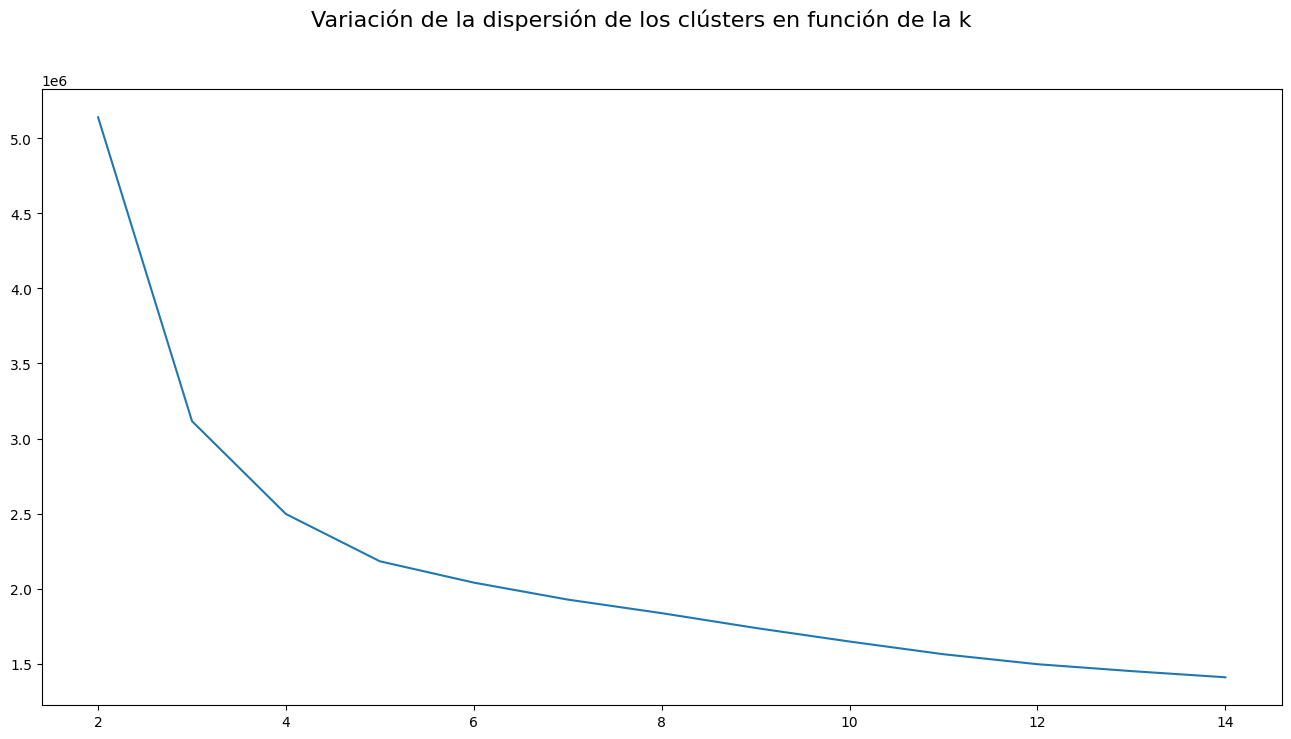

In [272]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

Vemos que hay dos puntos donde hay diferencia en la pendiente, uno con 4 clusters y otro mas pronunciado con 8. Este es el que cogemos

## Segmentación de los clientes con la "k adecuada"

In [286]:
# Añadimos el clustering a la pipeline 

pipe = Pipeline(steps = [
    
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))),
    ("Clustering", KMeans(n_clusters = 4, random_state = 175))
])

In [287]:
# Nos sirve para ver todos los pasos de la pipeline a la vez que fiteamos:
pipe.fit(df_product_features)

Pipeline(steps=[('RobustScaler', RobustScaler(quantile_range=(0, 99.0))),
                ('Clustering', KMeans(n_clusters=4, random_state=175))])

In [288]:
#X_processed = pipe[:2].transform(df_features)
X_processed = df_product_features.copy() 
#para poder analizar las variables sin escalado nos saltamos los ultimos pasos y procesamos los datos iniciales justo antes del escalado

In [289]:
labels = pipe.predict(df_product_features)
X_processed["cluster"] = labels

In [290]:
X_processed.shape

(8354260, 23)

In [291]:
X_processed.head()

,total_sales,min_sales,mean_sales,median_sales,max_sales,min_price,mean_price,median_price,max_price,total_revenue,...,min_revenue,Boston,New York,Philadelphia,category_ACCESORIES,category_HOME_&_GARDEN,category_SUPERMARKET,weekend,holiday,cluster
item,,,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001,4093,0,1.493796,0.0,13,6.65,11.467211,10.9858,12.7414,45020.6596,...,0.0,25.580259,61.935011,12.48473,True,False,False,33.276325,1.343758,3
ACCESORIES_1_001,4093,0,1.493796,0.0,13,6.65,11.467211,10.9858,12.7414,45020.6596,...,0.0,25.580259,61.935011,12.48473,True,False,False,33.276325,1.343758,3
ACCESORIES_1_001,4093,0,1.493796,0.0,13,6.65,11.467211,10.9858,12.7414,45020.6596,...,0.0,25.580259,61.935011,12.48473,True,False,False,33.276325,1.343758,3
ACCESORIES_1_001,4093,0,1.493796,0.0,13,6.65,11.467211,10.9858,12.7414,45020.6596,...,0.0,25.580259,61.935011,12.48473,True,False,False,33.276325,1.343758,3
ACCESORIES_1_001,4093,0,1.493796,0.0,13,6.65,11.467211,10.9858,12.7414,45020.6596,...,0.0,25.580259,61.935011,12.48473,True,False,False,33.276325,1.343758,3


### Ficha de los productos

In [292]:
ficha_df = pd.DataFrame()
media_df = pd.DataFrame()

In [293]:
df_product_features.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['total_sales', 'min_sales', 'mean_sales', 'median_sales', 'max_sales',
       'min_price', 'mean_price', 'median_price', 'max_price', 'total_revenue',
       'mean_revenue', 'median_revenue', 'max_revenue', 'min_revenue',
       'Boston', 'New York', 'Philadelphia', 'category_ACCESORIES',
       'category_HOME_&_GARDEN', 'category_SUPERMARKET', 'weekend', 'holiday'],
      dtype='object')>

In [294]:
resumen_data = X_processed[["cluster", 'total_sales']].groupby("cluster").describe().T[1:]
resumen_data

cluster                       0              1             2              3
total_sales mean   20703.790179   13158.027885  1.775936e+05   10782.630551
            std    21114.666321   18844.447300  1.474047e+05   16906.410150
            min      823.000000     568.000000  1.801300e+04     660.000000
            25%     7020.250000    3477.750000  9.534600e+04    2474.000000
            50%    13810.500000    7232.500000  1.462410e+05    4821.000000
            75%    26051.000000   14382.000000  2.022380e+05   10957.000000
            max   166432.000000  153340.000000  1.002529e+06  122565.000000

In [295]:
for i, col in enumerate(['median_sales', 'max_sales', 'mean_price', 'mean_revenue',
       'median_revenue', 'Boston', 'New York', 'Philadelphia',
       'category_ACCESORIES', 'category_HOME_&_GARDEN', 'category_SUPERMARKET',
       'weekend', 'holiday']):
    resumen_data = X_processed[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = pd.concat([ficha_df, resumen_data])

In [296]:
for i, col in enumerate(['median_sales', 'max_sales', 'mean_price', 'mean_revenue',
       'median_revenue', 'Boston', 'New York', 'Philadelphia',
       'category_ACCESORIES', 'category_HOME_&_GARDEN', 'category_SUPERMARKET',
       'weekend', 'holiday']):
    resumen_data = X_processed.groupby("cluster")[col].mean()
    media_df[col + '_mean'] = resumen_data
media_df = media_df.T

In [297]:
media_df.style.background_gradient(cmap = 'Blues', axis = 1)

cluster,0,1,2,3
median_sales_mean,4.780134,3.191346,48.588235,2.600355
max_sales_mean,75.281994,43.374038,528.500000,35.095915
mean_price_mean,3.968581,6.807346,4.211203,7.313569
mean_revenue_mean,23.886086,23.306939,171.405513,18.604483
median_revenue_mean,14.817312,14.481587,121.127760,11.563689
Boston_mean,25.135312,28.277844,31.564886,29.152964
New York_mean,44.482645,47.558093,41.529645,45.048545
Philadelphia_mean,30.382043,24.164063,26.905469,25.798490
category_ACCESORIES_mean,0.000000,0.000000,0.019608,1.000000
category_HOME_&_GARDEN_mean,0.000000,1.000000,0.068627,0.000000


In [317]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

## >> Clustering por tienda

In [299]:
df_sales.head()

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price,revenue
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201104,0,12.7414,0.0
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201105,0,12.7414,0.0
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201106,0,12.7414,0.0
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201107,0,12.7414,0.0
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201108,0,12.7414,0.0


In [300]:
df_store_features = df_sales.groupby('store').agg(
                        total_sales = ('qty_sold', 'sum'),
                        min_sales = ('qty_sold', 'min'),
                        mean_sales = ('qty_sold', 'mean'),
                        max_sales = ('qty_sold', 'max'),
                        min_price = ('sell_price', 'min'),
                        max_price = ('sell_price', 'max'),    
                        total_revenue = ('revenue', 'sum'),
                        mean_revenue = ('revenue', 'mean'),
                        max_revenue = ('revenue', 'max'),
                        min_revenue = ('revenue','min')
                        
                    )
df_store_features

#al hacer el groupby ya tenemos el item como index

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue,max_revenue,min_revenue
store,,,,,,,,,,
Back_Bay,6089330,0,7.288892,1215,0.0240,41.2034,2.194624e+07,26.269516,6968.4552,0.0
Brooklyn,4103676,0,4.912076,567,0.0120,41.2034,1.504681e+07,18.010937,1744.9920,0.0
Greenwich_Village,7698216,0,9.214719,1697,0.0125,41.2034,2.773509e+07,33.198741,4153.3200,0.0
Harlem,5685475,0,6.805480,638,0.2400,41.2034,2.150717e+07,25.743960,1613.5200,0.0
Midtown_Village,5149062,0,6.163397,690,0.0120,44.8500,1.823533e+07,21.827588,1079.9520,0.0
Queen_Village,6427782,0,7.694017,1695,0.0125,134.1500,2.075230e+07,24.840382,2208.3840,0.0
Roxbury,7214384,0,8.635575,2076,0.0600,38.5168,2.526658e+07,30.243953,3453.6642,0.0
South_End,5595292,0,6.697532,1676,0.0600,65.7750,1.934092e+07,23.150972,2219.7000,0.0
Tribeca,11188180,0,13.392186,3976,0.0133,41.2034,3.949288e+07,47.272742,8623.3680,0.0


In [301]:
pipe = Pipeline(steps = [
    #("Imputer", KNNImputer()), --> No tenemos nulos
    #("CustomTransformer", ClientIdFeatureGenerator), # Aqui añadimos el Transformer que hemos generado
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))) #es un Scaler para quitar los outliers superiores en este caso
])

In [302]:
df_store_transformed = pipe.fit_transform(df_store_features)

In [303]:
df_store_transformed

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue,max_revenue,min_revenue
store,,,,,,,,,,
Back_Bay,-0.024995,0.0,-0.024995,-0.071186,0.025260,0.000000,0.015546,0.015546,0.558765,0.0
Brooklyn,-0.318279,0.0,-0.318279,-0.271309,-0.031398,0.000000,-0.279454,-0.279454,-0.147636,0.0
Greenwich_Village,0.212640,0.0,0.212640,0.077671,-0.029037,0.000000,0.263061,0.263061,0.178057,0.0
Harlem,-0.084645,0.0,-0.084645,-0.249382,1.045090,0.000000,-0.003227,-0.003227,-0.165416,0.0
Midtown_Village,-0.163874,0.0,-0.163874,-0.233323,-0.031398,0.040306,-0.143122,-0.143122,-0.237573,0.0
Queen_Village,0.024995,0.0,0.024995,0.077054,-0.029037,1.027330,-0.035503,-0.035503,-0.084969,0.0
Roxbury,0.141177,0.0,0.141177,0.194719,0.195231,-0.029695,0.157515,0.157515,0.083438,0.0
South_End,-0.097965,0.0,-0.097965,0.071186,0.195231,0.271588,-0.095850,-0.095850,-0.083438,0.0
Tribeca,0.728113,0.0,0.728113,0.781501,-0.025260,0.000000,0.765791,0.765791,0.782569,0.0


In [304]:
sse_store = {}

for k in range(2, 10):                  # Ver si este rango esta bien o modificar.

    print(f"Fitting pipe with {k} clusters")

    clustering_store_model = KMeans(n_clusters = k)
    clustering_store_model.fit(df_store_transformed)

    sse_store[k] = clustering_store_model.inertia_ #la metrica inertia es la dispersion

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters


Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters


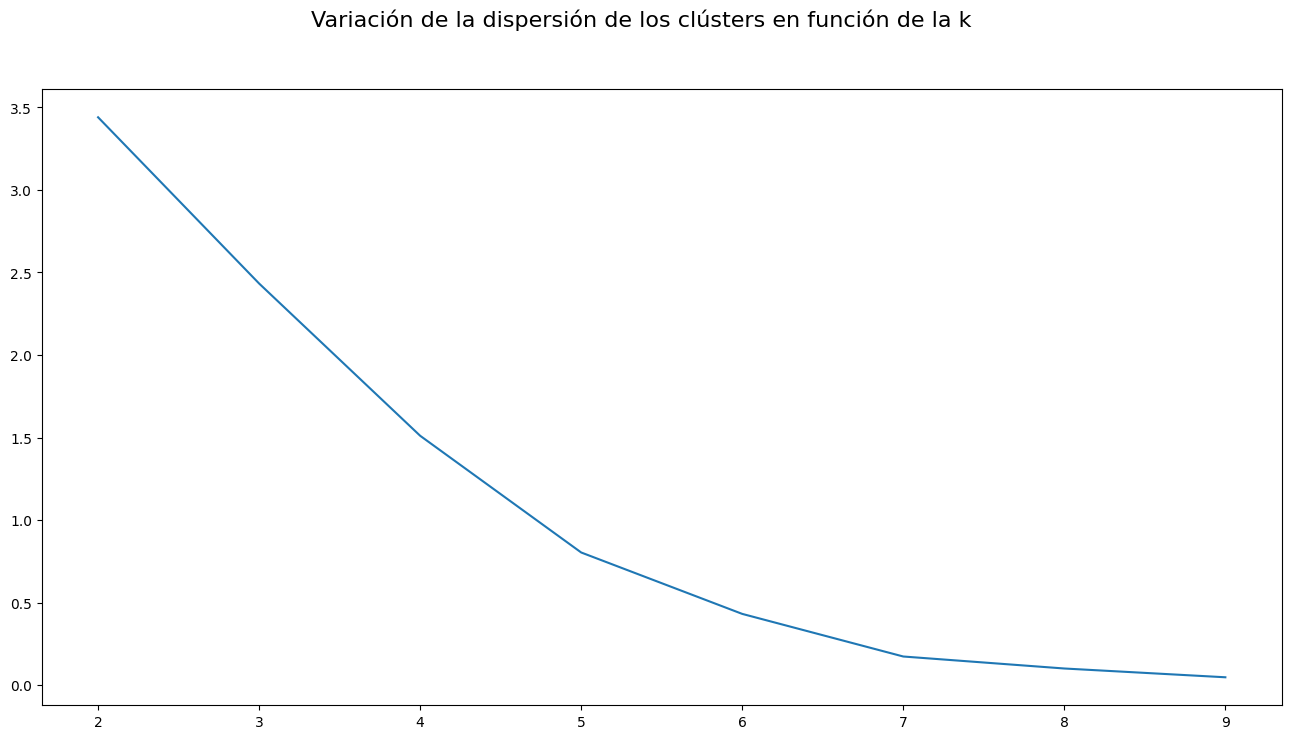

In [305]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_store_values = list(sse_store.keys())
y_store_values = list(sse_store.values())

ax.plot(x_store_values, y_store_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

### Segmentacion de los clientes por stores.

In [306]:
pipe_store = Pipeline(steps = [
    
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))),
    ("Clustering", KMeans(n_clusters = 5, random_state = 175))
])

In [307]:
# Nos sirve para ver todos los pasos de la pipeline a la vez que fiteamos:
pipe_store.fit(df_store_features)

Pipeline(steps=[('RobustScaler', RobustScaler(quantile_range=(0, 99.0))),
                ('Clustering', KMeans(n_clusters=5, random_state=175))])

In [308]:
#X_processed = pipe[:2].transform(df_features)
X_store_processed = df_store_features.copy() 

In [309]:
labels_store = pipe_store.predict(df_store_features)
X_store_processed["cluster"] = labels_store

In [310]:
X_store_processed.shape

(10, 11)

In [311]:
X_store_processed.head()

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue,max_revenue,min_revenue,cluster
store,,,,,,,,,,,
Back_Bay,6089330,0,7.288892,1215,0.0240,41.2034,2.194624e+07,26.269516,6968.4552,0.0,0
Brooklyn,4103676,0,4.912076,567,0.0120,41.2034,1.504681e+07,18.010937,1744.9920,0.0,1
Greenwich_Village,7698216,0,9.214719,1697,0.0125,41.2034,2.773509e+07,33.198741,4153.3200,0.0,0
Harlem,5685475,0,6.805480,638,0.2400,41.2034,2.150717e+07,25.743960,1613.5200,0.0,3
Midtown_Village,5149062,0,6.163397,690,0.0120,44.8500,1.823533e+07,21.827588,1079.9520,0.0,1


### Ficha de las tiendas

In [312]:
ficha_df_store = pd.DataFrame()

In [313]:
df_store_features.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['total_sales', 'min_sales', 'mean_sales', 'max_sales', 'min_price',
       'max_price', 'total_revenue', 'mean_revenue', 'max_revenue',
       'min_revenue'],
      dtype='object')>

In [314]:
resumen_data_store = X_store_processed[["cluster", 'total_sales']].groupby("cluster").describe().T[1:]
resumen_data_store

cluster                      0             1           2          3  \
total_sales mean  7.000643e+06  4.626369e+06  11188180.0  5685475.0   
            std   8.254649e+05  7.391995e+05         NaN        NaN   
            min   6.089330e+06  4.103676e+06  11188180.0  5685475.0   
            25%   6.651857e+06  4.365022e+06  11188180.0  5685475.0   
            50%   7.214384e+06  4.626369e+06  11188180.0  5685475.0   
            75%   7.456300e+06  4.887716e+06  11188180.0  5685475.0   
            max   7.698216e+06  5.149062e+06  11188180.0  5685475.0   

cluster                      4  
total_sales mean  6.189029e+06  
            std   5.174648e+05  
            min   5.595292e+06  
            25%   6.011537e+06  
            50%   6.427782e+06  
            75%   6.485897e+06  
            max   6.544012e+06

In [315]:
for i, col in enumerate(['total_sales', 'min_sales', 'mean_sales', 'max_sales', 'min_price',
       'max_price', 'total_revenue', 'mean_revenue']):
    resumen_data_store = X_store_processed[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df_store = pd.concat([ficha_df_store, resumen_data_store])

In [316]:
ficha_df_store.style.background_gradient(cmap = 'Greens', axis = 1)